# Análise dos dados estratificados/filtrados

## Por que filtrar os dados?
Tem por objetivo separar os dados levantados em grupos distintos, como por exemplo, estratificação por local, por data, por turno, por tipo, etc. A estratificação permite analisar os dados separadamente para ajudar nas comparações entre diversos grupos e descobrir onde realmente está a verdadeira causa de um problema.

## Quais cuidados devemos ter?
Uma separação errada pode gerar falsas causalidades e omitir informações relevantes sobre os seus dados. Fica a dica de leitura do livro [Como mentir com estatística](https://www.amazon.com/Mentir-Estat%C3%ADstica-Darrell-Irving-Casotti/dp/858057952X) que lista os erros mais comuns que podemos gerar nesse tipo de análise.

![alt text](https://mysimple.name/wp-content/uploads/2016/04/datafilter-300x150.png)

**Como estamos criando um notebook novo precisamos importar o `pandas` novamente e ler novamente o nosso dataset do `titanic`**

In [2]:
import pandas
titanic = pandas.read_csv("https://databootcamp.nyc3.digitaloceanspaces.com/titanic.csv")

### 5 - Filtrando o DataFrame

Os filtros do `pandas` usam os mesmos símbolos para validar as condições lógicas do `if` (`==`, `!=`, `>`, `<`, etc).

![alt text](https://www.wikihow.com/images/thumb/a/a9/167107-22-1.jpg/aid167107-v4-728px-167107-22-1.jpg.webp)

**Se quisermos recuperar apenas os passageiros da `primeira classe`**

Primeiro, temos que verificar a igualdade entre a `coluna` e um valor.

In [2]:
titanic["Pclass"] == 1

0      False
1       True
2      False
3       True
4      False
       ...  
886    False
887     True
888    False
889     True
890    False
Name: Pclass, Length: 891, dtype: bool

Nesse processo para cada linha será perguntada se ela tem um valor `igual a 1`.

Após isso podemos usar esse filtro que criamos em um dataframe para retornar uma versão filtrada do dataset, somente com os dados dos passageiros da primeira classe.

In [3]:
primeira_classe = titanic["Pclass"] == 1
titanic[ primeira_classe ].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S


**O resultado do filtro é outro dataframe.**

Podemos atribuir o resultado do filtro em uma variável e trabalhar com ela sem medo de alterar o dataframe original.

In [4]:
primeira_classe_df = titanic[titanic["Pclass"] == 1]
type(primeira_classe_df)

pandas.core.frame.DataFrame

**Filtro de negação**

Nós usamos essa condição quando queremos todos os resultados `menos algum`.

Queremos todos os dados de passageiros que não tenha o valor da coluna `Sex` como `male`.

In [5]:
nao_homem = titanic["Sex"] != "male"
titanic[nao_homem]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


**Nós usamos filtros para fazer uma análise segmentada da população.**

### **Desafio:** Qual a idade média das mulheres e dos homens?

![alt text](https://static.vix.com/pt/sites/default/files/styles/large/public/a/atrasada-relogio-pulso-1116-1400x800.jpg?itok=qv3gUH6U)

In [18]:
#solução
homem = titanic["Sex"] == "male"
mulher = titanic["Sex"] == "female"
print("Homem:", titanic[homem].Age.mean())
print("Mulher:", titanic[mulher].Age.mean())

# outro modo:
titanic.groupby('Sex')['Age'].mean()


Homem: 30.72664459161148
Mulher: 27.915708812260537


Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

**Filtrando com mais de uma condição**

Os operadores lógicos no `pandas` são: `&` para o "e" e `|` para o "ou"

![alt text](https://upload.wikimedia.org/wikipedia/commons/4/4a/Truth_table_for_AND%2C_OR%2C_and_NOT.png)

**Pessoas que são da primeira classe e sobreviveram**

Vamos primeiro criar as duas condições separadas, primeira classe e sobreviveram.

In [19]:
primeira_classe = titanic["Pclass"] == 1
sobreviveu = titanic["Survived"] == 1

Após a criação das variáveis devemos usar um filtro de junção `&` que significa `E`

In [21]:
titanic[ primeira_classe & sobreviveu ]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
...,...,...,...,...,...,...,...,...,...,...,...,...
862,863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.9292,D17,S
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


### **Desafio:** Quantas pessoas estavam nas cabines `D35` e `D36`?

![alt text](https://static.vix.com/pt/sites/default/files/styles/large/public/a/atrasada-relogio-pulso-1116-1400x800.jpg?itok=qv3gUH6U)

In [67]:
#solução
D35 = titanic["Cabin"] == "D35"
D36 = titanic["Cabin"] == "D36"

titanic[D35 | D36].PassengerId.count()

'D36'

**Normalmente aproveitamos os filtros para fazer análises comparativas**

Média das idades

In [69]:
media = titanic["Age"].mean()

Médias das idades das pessoas que sobreviveram e estão na primeira classe.

**Dica: Vamos pegar a média e aplicar os filtros em uma linha somente**

In [71]:
media_filtro = titanic[(titanic["Pclass"] == 1) & (titanic["Survived"] == 1) ]["Age"].mean()

Vamos exibir o resultado usando a **interpolação de strings**

In [77]:
print("""
Média de idade: {}
Média de idade dos sobreviventes da primeira classe: {}""".format(
    media,
    media_filtro)
)


Média de idade: 29.69911764705882
Média de idade dos sobreviventes da primeira classe: 35.36819672131148


### **Desafio:** Retorne apenas os passageiros da `primeira classe que sobreviveram` e os passageiros da `terceira classe que não sobreviveram`

![alt text](https://static.vix.com/pt/sites/default/files/styles/large/public/a/atrasada-relogio-pulso-1116-1400x800.jpg?itok=qv3gUH6U)

In [105]:
#solução
titanic[(titanic["Pclass"]==1)&(titanic["Survived"] ==1) | (titanic["Pclass"]==3)&(titanic["Survived"] ==0)]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# 6 - Visualizando os dados

Visualização de dados é a representação gráfica dos dados. Envolve produzir imagens que comunicam relacionamentos entre os dados.

![alt text](https://miro.medium.com/max/1838/0*FUZYhPTfKKJjAHPk.)

Existem dezenas de tipos de gráficos para nos ajudar na escolha do melhor gráfico recomendo visitar esse [PDF](http://experception.net/Franconeri_ExperCeptionDotNet_DataVisQuickRef.pdf).

**Tipos de gráficos (plots) mais populares**

- 'line' : line plot (default)
- 'bar' : vertical bar plot
- 'barh' : horizontal bar plot
- 'hist' : histogram
- 'box' : boxplot
- 'kde' : Kernel Density Estimation plot
- 'density' : same as 'kde'
- 'area' : area plot
- 'pie' : pie plot
- 'scatter' : scatter plot
- 'hexbin' : hexbin plot


**Histograma** é o gráfico que mostra a frequência dos dados, ou seja, quantas vezes cada valor aparece nos dados.

Vamos usas o histograma para comparar o valor de `Fare` de quem sobreviveu e de quem não sobreviveu

In [3]:
sobreviventes = titanic[titanic["Survived"] == 1]

**Vamos usar um pouco de magia!**

**Tudo que começa com `%` são as magias do IPython pro Jupyter Notebook. Fora do IPython (Jupyter) elas não funcionam!**

Um pouco mais sobre magias aqui: http://ipython.readthedocs.io/en/stable/interactive/magics.html

In [4]:
%matplotlib inline

Agora tudo que usar o `matplotlib` vai ser renderizado na tela.

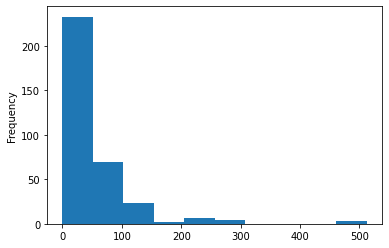

In [109]:
sobreviventes["Fare"].plot.hist()

O `histograma` agrupa os dados em `bins`, que são como baldes para colocar o seu dado. Se você precisar de uma visualização com mais detalhes sobre o grupos você pode aumentar a quantidade de bins.

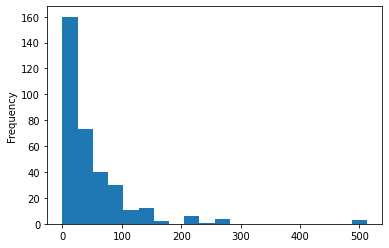

In [111]:
sobreviventes["Fare"].plot.hist(bins=20)

### **Desafio:** Gere um historgrama das tarifas apenas com quem `não sobreviveu`

![alt text](https://static.vix.com/pt/sites/default/files/styles/large/public/a/atrasada-relogio-pulso-1116-1400x800.jpg?itok=qv3gUH6U)

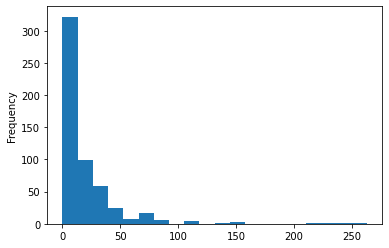

In [113]:
#solução
nsobreviventes = titanic[titanic["Survived"] == 0]
nsobreviventes["Fare"].plot.hist(bins=20)

**Dica: Para juntar dois resultados em um mesmo gráfico é bem simples, basta colocar um gráfico e na linha de baixo outro**

Por baixo dos panos isso funciona pois é um objeto único para tudo, então alterando o último plot altera os 2 para colocar a legenda.

Vamos comparar as faixas etárias entre as populações da primeira e segunda classe.

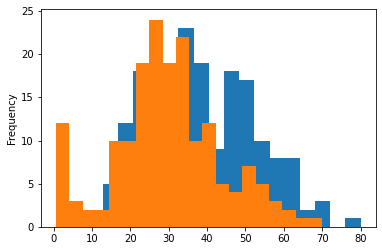

In [114]:
titanic[titanic["Pclass"] == 1]["Age"].plot.hist(bins=20)
titanic[titanic["Pclass"] == 2]["Age"].plot.hist(bins=20)

Podemos inserir uma legenda paga facilitar a leitura

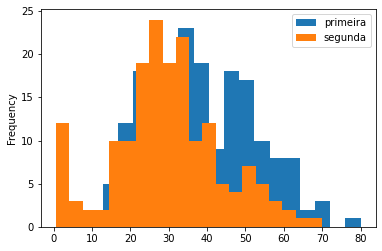

In [115]:
titanic[titanic["Pclass"] == 1]["Age"].plot.hist(bins=20)
titanic[titanic["Pclass"] == 2]["Age"].plot.hist(bins=20).legend(["primeira", "segunda"])

**Plot scatter:** mostra dispersão entre 2 conjuntos de dados. No caso, estamos vendo a relação do preço pago com a idade.

Vamos verificar a relação entre a `idade` e o `valor do ticket`

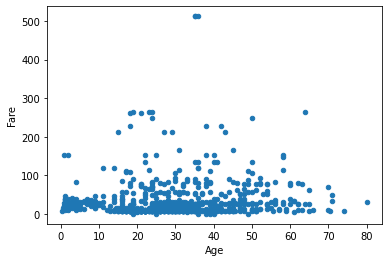

In [116]:
titanic.plot.scatter(x = "Age", y = "Fare")

**Plot pie:** mostra a proporção entre os dados de uma coluna. É indicado pra uma visualização rapida, porem se a coluna tem muitas dimensoes ele fica muito confuso.

Vamos ver o pie chart de `Pclass`

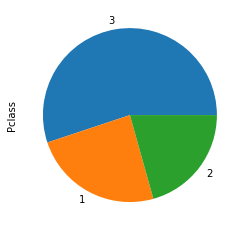

In [117]:
titanic["Pclass"].value_counts().plot.pie()

**Plot boxplot:** Mostra a distribuição dos dados em percentis, inclusive destacando os outliers

Vamos olhar a distribuição das idades

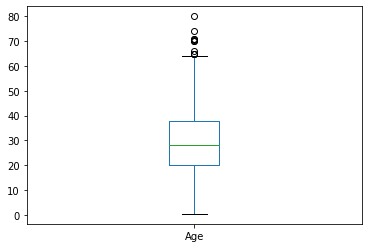

In [118]:
titanic["Age"].plot(kind="box")

### **Desafio:** Gere um boxplot das tarifas por classe

![alt text](https://static.vix.com/pt/sites/default/files/styles/large/public/a/atrasada-relogio-pulso-1116-1400x800.jpg?itok=qv3gUH6U)

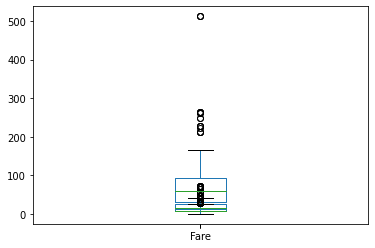

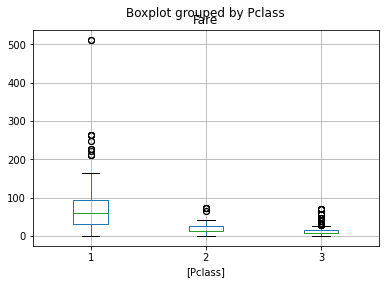

In [134]:
#solução
titanic[titanic["Pclass"] == 1]["Fare"].plot(kind="box")
titanic[titanic["Pclass"] == 2]["Fare"].plot(kind="box")
titanic[titanic["Pclass"] == 3]["Fare"].plot(kind="box")
titanic.boxplot(column=["Fare"], by=["Pclass"])

### Nós iremos ver mais gráficos e outras bibliotecas de visualização no decorrer do curso

# 7 - transformação dos dados

Muitas vezes quando estamos manipulando um dataset precisamos criar colunas artificiais para nos ajudar nas análises, elas podem ser junções de outras colunas ou parte de dados delas.

No titanic temos 2 colunas que somandas dizem se o passageiro tinha parentes à bordo.

**Vamos criar uma coluna que diga se o passageiro tinha parentes à bordo, somando o valor de `sibsp` e `parch`**

Primeira vamos definir uma função

In [135]:
def num_parentes(linha):
    return linha["SibSp"] + linha["Parch"]

Após criarmos a função vamos **aplicar** ela para cada linha do dataframe.

**É como se fosse um `loop` por cada linha automático!**

In [136]:
titanic.apply(num_parentes, axis=1)

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Length: 891, dtype: int64

`axis = 1` representa que a função é aplicada linha a linha. 

`axis = 0`, que é o valor padrão, representa qua a função é aplicada coluna a coluna.

![alt text](https://www.w3resource.com/w3r_images/pandas-dataframe-apply-1.png)

**Como incluo essa coluna no meu DataFrame?**

É muito parecido a um Dicionário `dict` do Python 

In [137]:
parentes = titanic.apply(num_parentes, axis=1)
titanic["relatives"] = parentes

Vamos verificar se a coluna foi criada.

In [138]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'relatives'],
      dtype='object')

In [139]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1


### **Desafio:** Agora vamos separar a localização da cabine do seu número usando apply! Ex: *C85* deve retornar uma série chamada *CabinLocation* somente com o valor *C*.

Isso pode ser útil para saber quem sobreviveu.

![alt text](https://static.vix.com/pt/sites/default/files/styles/large/public/a/atrasada-relogio-pulso-1116-1400x800.jpg?itok=qv3gUH6U)

In [166]:
#solução
def num_parentes(linha):
    if pandas.notnull(linha):
        return linha[0]
    else:
        return linha

titanic["cabinc"] = titanic.Cabin.apply(num_parentes)
titanic[titanic.Cabin == "C85"]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,cabinc
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,C


**Agora que temos um DataFrame modificado podemos salvar ele para não perdermos a coluna criada**

In [ ]:
titanic.to_csv("titanic_1_aula.csv", index=False)

Usamos o index `False` para ele não criar um índice novo pois os nossos dados já tem um index.

Se no futuro você precisar exportar seu DataFrame para outro formato é possível :)

In [ ]:
#titanic.to_ # use o tab